<a href="https://colab.research.google.com/github/joaquimrafael/Data_management/blob/main/Pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->



# Lab: Pandas II

O principal objetivo deste Lab é você explorar o `Pandas` e recursos para várias tarefas importantes na análise de dados como o tratamento de datas, dados nulos, entendimento dos dados, remoção de duplicatas, criação de novas colunas de dados e seleções.

<br>

Referências e Materiais úteis para este Lab:

* [Notas de Aula](https://colab.research.google.com/github/Rogerio-mack/Analise_de_dados_labs/blob/main/Lab_Pandas_notes.ipynb)

<br>

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/PDSH-cover.png
" width=150>

* [Jake VanderPlas. **Python Data Science Handbook**](https://jakevdp.github.io/PythonDataScienceHandbook/)

* [Pandas Cheat Sheet for Data Science in Python](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* [Pandas Manual](https://pandas.pydata.org/)

<br>
---



# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## **CASE: NFL**

Acesse a base de dados [`NFL Offensive Stats`](https://github.com/Rogerio-mack/Analise_de_dados_labs/raw/main/data/nfl_offensive_stats.csv) para as questões a seguir.



In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/Analise_de_dados_labs/raw/main/data/nfl_offensive_stats.csv')
df.head()

,game_id,player_id,position,player,team,pass_cmp,pass_att,pass_yds,pass_td,pass_int,...,OT,Roof,Surface,Temperature,Humidity,Wind_Speed,Vegas_Line,Vegas_Favorite,Over_Under,game_date
0,201909050chi,RodgAa00,QB,Aaron Rodgers,GNB,18,30,203,1,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
1,201909050chi,JoneAa00,RB,Aaron Jones,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
2,201909050chi,ValdMa00,WR,Marquez Valdes-Scantling,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
3,201909050chi,AdamDa01,WR,Davante Adams,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019
4,201909050chi,GrahJi00,TE,Jimmy Graham,GNB,0,0,0,0,0,...,False,outdoors,grass,65,69,10,-3.5,CHI,47.0,9/5/2019


##### Q1. Verifique se existem dados nulos na base. Se sim, exclua as linhas com dados nulos verificando antes o número de linhas antes e depois.

**Comandos úteis:** `.isnull()`, `.dropna()`

In [ ]:
# seu codigo
print('O tamanho original é', len(df), 'linhas')

O tamanho original é 19973 linhas


In [ ]:
soma = df.isnull().sum().sum()
if soma > 0:
  print('Existem {} dados nulos na base'.format(soma))
  df = df.dropna()
  print('O novo número de linhas é', df.shape[0])

Existem 46 dados nulos na base
O novo número de linhas é 19927


In [ ]:
#df.dropna(Inplace=True)

##### Q2. Qual o período de jogos coberto pela base de dados?

Dica: 1o, o período é dado pela menor e maior datas dos jogos; 2o, verifique o formato das datas para ter certeza que as funções de `min()` e `max()` traram a informação correta; 3o, se necessário, **pesquise** e empregue a função `pd.to_datetime()` para converter o formato do atributo.

**Comandos úteis:** `.dtypes`, `pd.to_datetime()`

In [ ]:
# seu código
df.dtypes

game_id            object
player_id          object
position           object
player             object
team               object
                   ...   
Wind_Speed          int64
Vegas_Line        float64
Vegas_Favorite     object
Over_Under        float64
game_date          object
Length: 69, dtype: object

In [ ]:
df['game_date'] = pd.to_datetime(df['game_date'])
#min(df['game_date'])
#max(df['game_date'])
print('O periodo dos jogos é de {} a {}'.format(min(df['game_date']), max(df['game_date'])))

O periodo dos jogos é de 2019-09-05 00:00:00 a 2022-02-13 00:00:00


<ipython-input-27-a494f2c1c523>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['game_date'] = pd.to_datetime(df['game_date'])


##### Q3. Pesquise a função `day_name()` do `pandas` e crie um novo atributo com o nome do dia da semana.

**Comandos úteis:** `.day_name()`

Dica: Veja também como criar uma nova coluna em um DataFrame.

In [ ]:
# seu código

df['week_day'] = df.game_date.dt.day_name()
df.week_day

0        Thursday
1        Thursday
2        Thursday
3        Thursday
4        Thursday
           ...   
19968      Sunday
19969      Sunday
19970      Sunday
19971      Sunday
19972      Sunday
Name: week_day, Length: 19927, dtype: object

##### Q4. Quantos jogos há aos sábados, domingos e segundas-feiras na base?

**Comandos úteis:** `.nunique()`

Dica: antes de responder essa pergunta analise a base. Quantos jogos há na base? Não é o número de linhas!

In [ ]:
# seu código

print('O número de jogos é', df.game_id.nunique())

O número de jogos é 818


In [ ]:
print('No sabado temos {} jogos'.format(df[df.week_day == 'Saturday'].game_id.nunique()))

print('No domingo temos {} jogos'.format(df[df.week_day == 'Sunday'].game_id.nunique()))

print('Na segunda temos {} jogos'.format(df[df.week_day == 'Monday'].game_id.nunique()))

No sabado temos 26 jogos
No domingo temos 682 jogos
Na segunda temos 55 jogos


##### Q5. Crie um `DataFrame de Jogos`, apenas com o id do jogo, a data e nome do dia da semana, e as características do tempo ('Temperature', 'Humidity', 'Wind_Speed'). Remova as duplicatas.

**Comandos úteis:** `.drop_duplicates()`

In [ ]:
# seu código

jogos = df[['game_id', 'game_date','week_day','Temperature', 'Humidity', 'Wind_Speed']]
jogos.head()


,game_id,game_date,week_day,Temperature,Humidity,Wind_Speed
0,201909050chi,2019-09-05,Thursday,65,69,10
1,201909050chi,2019-09-05,Thursday,65,69,10
2,201909050chi,2019-09-05,Thursday,65,69,10
3,201909050chi,2019-09-05,Thursday,65,69,10
4,201909050chi,2019-09-05,Thursday,65,69,10


In [ ]:
jogos = jogos.drop_duplicates()
jogos.head()

,game_id,game_date,week_day,Temperature,Humidity,Wind_Speed
0,201909050chi,2019-09-05,Thursday,65,69,10
24,201909080car,2019-09-08,Sunday,87,53,3
44,201909080cle,2019-09-08,Sunday,71,55,10
68,201909080crd,2019-09-08,Sunday,72,45,0
91,201909080dal,2019-09-08,Sunday,72,45,0


##### Q6. Faça um gráfico de 'distribuição' dos jogos ao longo dos dias da semana. Quais os 3 dias com mais número de jogos?  



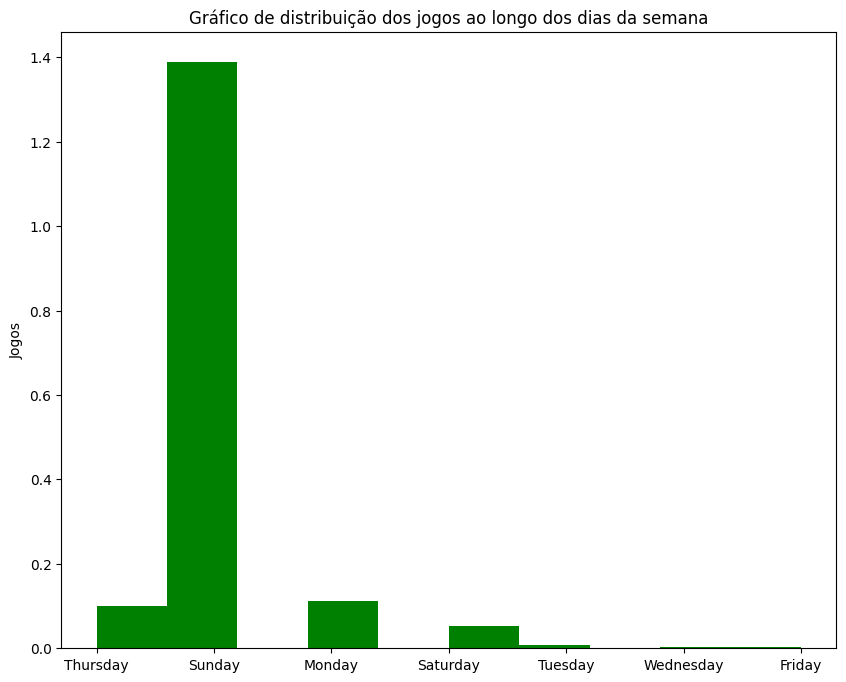

In [ ]:
# seu código

plt.figure(figsize=(10,8))
plt.hist('week_day', data = jogos, color = 'green', density=True)
plt.title("Gráfico de distribuição dos jogos ao longo dos dias da semana")
plt.ylabel('Jogos',fontsize=10)
plt.show()

In [ ]:
print('Os 3 dias que mais recebem jogos são: Segunda, Quinta e Sábado')

Os 3 dias que mais recebem jogos são: Segunda, Quinta e Sábado


##### Q7. Baseado nesse histórico de jogos, qual a probabilidade de você ir a um jogo da NFL em um dia em a a temperatura é acima de 70F?

- Menos de 10%
- Entre 10% e 20%
- Entre 21% e 30%
- Entre 31% e 40%
- Entre 41% e 50%
- Mais de 50%  

Sugestão: Faça um gráfico de distribuição da temperatura durantes os jogos, verifique os quartis etc.

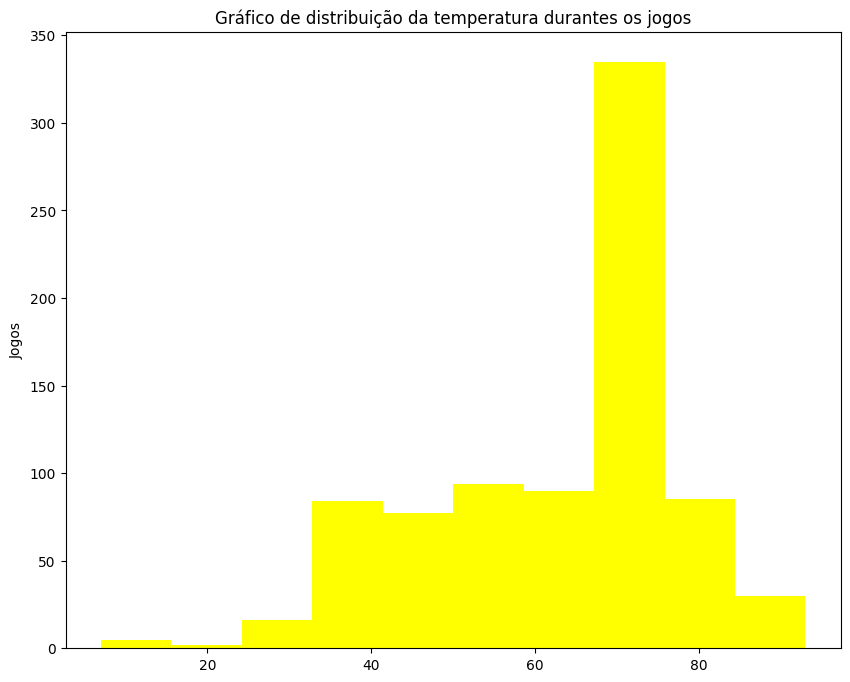

In [ ]:
# seu código
plt.figure(figsize=(10,8))
plt.hist('Temperature', data = jogos, color = 'yellow')
plt.title("Gráfico de distribuição da temperatura durantes os jogos")
plt.ylabel('Jogos',fontsize=10)
plt.show()

In [ ]:
print('A mediana é',jogos.Temperature.median())

print('O primeiro quartil é:', jogos.Temperature.quantile(0.25))

print('O terceiro quartil é:', jogos.Temperature.quantile(0.75))

print('O menor valor é:', jogos.Temperature.min())

print('O menor valor é:', jogos.Temperature.max())

A mediana é 72.0
O primeiro quartil é: 52.0
O terceiro quartil é: 72.0
O menor valor é: 7
O menor valor é: 93


In [ ]:
n_jogos = jogos.shape[0]
selecao = (jogos["Temperature"] > 70)
jogos_quentes = jogos[selecao].shape[0]

print("A probabilidade é de {:.2f}".format(jogos_quentes/n_jogos))
print("Estando assim, no intervalo de mais de 50%")

A probabilidade é de 0.51
Estando assim, no intervalo de mais de 50%


##### Q8. Olhando jogadores lances mais rápidos de todas as jogadas (`rush_yds`),

a. Quais as posições dos jogadores (em que posição jogam) nos 10 lances mais rápidos?

b. Qual o time com mais jogadas entre as 10 mais rápidas?

In [ ]:
# seu código
df.nlargest(10, 'rush_yds')['position ']

12406    RB
12458    RB
1280     RB
6315     RB
11224    RB
8417     RB
5854     RB
9475     RB
17766    RB
6195     RB
Name: position , dtype: object

In [ ]:
print('Todos os jogadoes dos 10 lances mais rapidos jogam na posição RB')

Todos os jogadoes dos 10 lances mais rapidos jogam na posição RB


In [ ]:
df.nlargest(10, 'rush_yds').team

12406    IND
12458    TEN
1280     JAX
6315     SFO
11224    TEN
8417     TEN
5854     TEN
9475     MIN
17766    MIN
6195     TEN
Name: team, dtype: object

In [ ]:
print('O time com mais jogadores entre os 10 com lances mais rapidos é o Tennessee Titans')

O time com mais jogadores entre os 10 com lances mais rapidos é o Tennessee Titans
